# Funciones exponenciales y potenciales

Una investigación sociológica realizada en Caracas, deseaba determinar la relación entre la ausencia del padre en el hogar (tratamientos) y el nivel de autoestima alcanzado por los hijos varones (Y= variable dependiente), pero se sospecha que esta relación pudiera estar afectada por el clima familiar (covariable)

## Definiendo las variables

**Notación**:
* 1: familia con padrastro
* 2: familia con padre
* 3: familia sin padre

In [7]:
padre <- rep(c(1,2,3),each = 5)

In [3]:
clima <- c(30,20,15,20,25,28,12,20,10,10,10,15,20,10,10)
autoestima <- c(15,10,5,10,20,25,10,15,15,10,5,10,20,5,10)

In [8]:
padre <- as.factor(padre)

## Definiendo el modelo 

In [9]:
m1 <- lm(autoestima ~ clima + padre)

## Tabla de parámetros

In [10]:
summary(m1)


Call:
lm(formula = autoestima ~ clima + padre)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5502 -2.1343 -0.3624  1.3155  5.5437 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.0131     3.7481  -1.604 0.136949    
clima         0.8188     0.1562   5.241 0.000276 ***
padre2        7.9127     2.3130   3.421 0.005713 ** 
padre3        5.3690     2.5393   2.114 0.058137 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.343 on 11 degrees of freedom
Multiple R-squared:  0.7508,	Adjusted R-squared:  0.6828 
F-statistic: 11.04 on 3 and 11 DF,  p-value: 0.001203


Se observa que hay diferencias significativas con el clima, y tener padre con respecto a tener un padrastro.

## ANOVA

In [13]:
library(car)

Loading required package: carData



In [14]:
library(carData)

In [15]:
Anova(m1, type = 'III')

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),28.77012,1,2.573805,0.1369488998
clima,307.04148,1,27.468259,0.0002763887
padre,130.85386,2,5.853163,0.0185717143
Residuals,122.95852,11,NA,NA


In [27]:
TukeyHSD(aov(autoestima ~ clima + padre))

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: clima”
Warning message in TukeyHSD.aov(aov(autoestima ~ clima + padre)):
“'which' specified some non-factors which will be dropped”


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = autoestima ~ clima + padre)

$padre
         diff        lwr       upr     p adj
2-1  6.592814  0.8817835 12.303845 0.0244581
3-1  3.389222 -2.3218094  9.100252 0.2851467
3-2 -3.203593 -8.9146237  2.507438 0.3216377


In [23]:
library(agricolae)

In [24]:
m1.snk <- SNK.test(m1,'padre')

In [25]:
m1.snk

$statistics
   MSerror Df     Mean       CV
  11.17805 11 12.33333 27.10831

$parameters
  test name.t ntr alpha
   SNK  padre   3  0.05

$snk
     Table CriticalRange
2 3.112663      4.654040
3 3.819588      5.711031

$means
  autoestima      std r Min Max Q25 Q50 Q75
1         12 5.700877 5   5  20  10  10  15
2         15 6.123724 5  10  25  10  15  15
3         10 6.123724 5   5  20   5  10  10

$comparison
NULL

$groups
  autoestima groups
2         15      a
1         12      a
3         10      a

attr(,"class")
[1] "group"

## Modelo con interacción

In [29]:
m2 <- lm(autoestima ~ clima + padre + clima:padre)

In [30]:
summary(m2)


Call:
lm(formula = autoestima ~ clima + padre + clima:padre)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4615 -1.8021 -0.8871  1.5121  5.5769 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -5.7692     6.7220  -0.858   0.4130  
clima          0.8077     0.2977   2.714   0.0239 *
padre2         9.8015     7.7057   1.272   0.2353  
padre3        -0.4808     8.4747  -0.057   0.9560  
clima:padre2  -0.1222     0.3675  -0.333   0.7471  
clima:padre3   0.4423     0.4823   0.917   0.3830  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.394 on 9 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.6731 
F-statistic: 6.766 on 5 and 9 DF,  p-value: 0.006971


Aquí se muestra que la interacción no es significativa.

## Verificando los supuestos del modelo

In [31]:
residuos1 <- m1$residuals

In [32]:
shapiro.test(residuos1)


	Shapiro-Wilk normality test

data:  residuos1
W = 0.89004, p-value = 0.06715


Los residuos tienen una distribución normal.

In [34]:
bartlett.test(residuos1,padre)


	Bartlett test of homogeneity of variances

data:  residuos1 and padre
Bartlett's K-squared = 0.030163, df = 2, p-value = 0.985


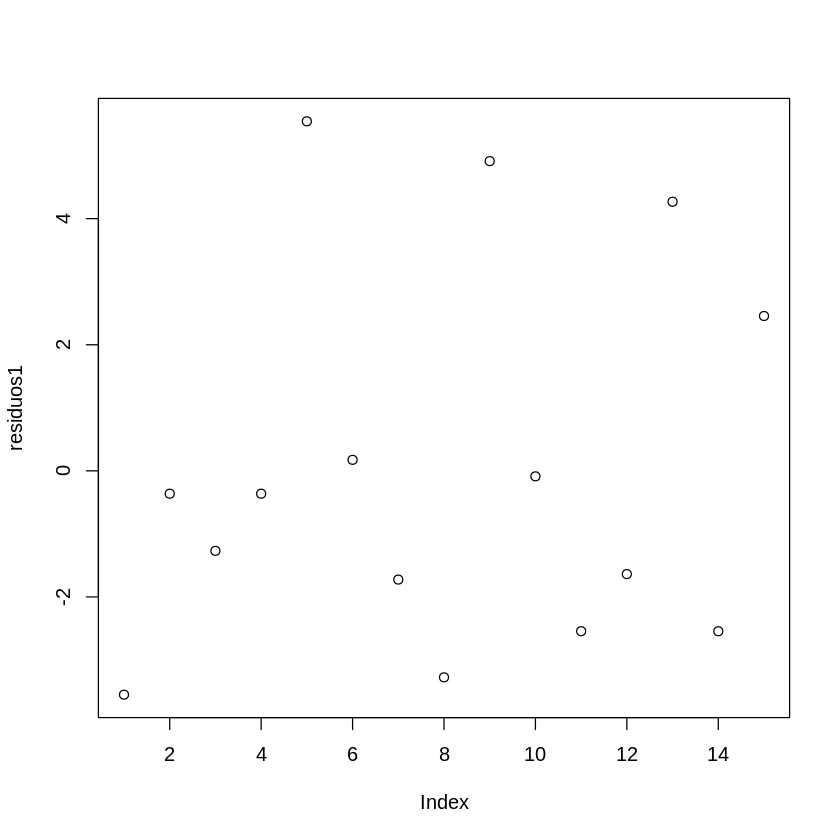

In [35]:
plot(residuos1)

Los residuos sí son homogéneos, no hay correlación entre ellos.